# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Mochamad Boval
- **Email:** mbovalap@gmail.com
- **ID Dicoding:** mochamadboval

## Menentukan Pertanyaan Bisnis

- Berapa nilai rata-rata PM2.5 dan PM10 setiap bulan pada tahun 2016?
- Berapa nilai rata-rata PM2.5 dan PM10 berdasarkan tanggal sepanjang tahun 2016?

## Import Semua Packages/Library yang Digunakan

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [23]:
aqi_df = pd.read_csv(
    "https://raw.githubusercontent.com/marceloreis/HTI/refs/heads/master/PRSA_Data_20130301-20170228/PRSA_Data_Shunyi_20130301-20170228.csv"
    )
pd.concat([aqi_df.head(), aqi_df.tail()])

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi
35059,35060,2017,2,28,19,27.0,72.0,8.0,92.0,800.0,16.0,10.3,1014.2,-12.4,0.0,W,1.8,Shunyi
35060,35061,2017,2,28,20,47.0,55.0,17.0,86.0,1100.0,19.0,9.8,1014.5,-9.9,0.0,NW,1.5,Shunyi
35061,35062,2017,2,28,21,18.0,28.0,4.0,30.0,500.0,64.0,9.1,1014.6,-12.7,0.0,NE,1.7,Shunyi
35062,35063,2017,2,28,22,18.0,20.0,9.0,33.0,500.0,59.0,7.1,1015.2,-13.2,0.0,WNW,1.8,Shunyi
35063,35064,2017,2,28,23,15.0,22.0,13.0,34.0,500.0,60.0,7.4,1014.9,-11.9,0.0,N,1.4,Shunyi


**Insight:**
- Dataset ini menyimpan data kualitas udara stasiun (distrik) Shunyi dari Maret 2013 - Februari 2017.
- Data diambil tiap satu jam sekali.

### Assessing Data

In [24]:
# Melihat jumlah missing value
aqi_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,913
PM10,548
SO2,1296
NO2,1365
CO,2178


In [25]:
print("Jumlah data duplikat:", aqi_df.duplicated().sum())

Jumlah data duplikat: 0


**Insight:**
- Ada 913 missing value pada PM2.5 dan 548 pada PM10.

### Cleaning Data

In [26]:
# Mencari nilai dominan PM2.5 untuk mengisi missing value
aqi_df["PM2.5"].value_counts()

,count
PM2.5,
3.0,824
8.0,637
10.0,624
9.0,591
7.0,577
...,...
445.0,1
467.0,1
428.0,1


In [27]:
# Mencari nilai dominan PM10 untuk mengisi missing value
aqi_df.PM10.value_counts()

,count
PM10,
6.0,648
5.0,431
14.0,394
13.0,383
12.0,372
...,...
59.3,1
33.5,1
26.6,1


**Insight:**
- Nilai dominan PM2.5 adalah 3.0 dan PM10 adalah 6.0.

In [28]:
# Mengisi missing value PM10 dengan metode Imputation
aqi_df.PM10.fillna(value=6.0, inplace=True)
aqi_df.isna().sum()

<ipython-input-28-526e3a1c6ad1>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  aqi_df.PM10.fillna(value=6.0, inplace=True)


,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,913
PM10,0
SO2,1296
NO2,1365
CO,2178


In [29]:
# Mengisi missing value PM2.5 dengan metode Imputation
aqi_df["PM2.5"].fillna(value=3.0, inplace=True)
aqi_df.isna().sum()

<ipython-input-29-c1c36a2aca63>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  aqi_df["PM2.5"].fillna(value=3.0, inplace=True)


,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,1296
NO2,1365
CO,2178


In [30]:
aqi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    35064 non-null  float64
 6   PM10     35064 non-null  float64
 7   SO2      33768 non-null  float64
 8   NO2      33699 non-null  float64
 9   CO       32886 non-null  float64
 10  O3       33575 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35013 non-null  float64
 13  DEWP     35010 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34581 non-null  object 
 16  WSPM     35020 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


**Insight:**
- Mengisi missing value pada PM2.5 dan PM10 menggunakan metode Imputation dengan value-nya berdasarkan nilai dominannya.
- Tidak ada perubahan tipe data pada PM2.5 dan PM10 setelah proses cleaning ini.

## Exploratory Data Analysis (EDA)

### Explore ...

In [31]:
# Mengumpulkan data tahun 2016
aqi_2016 = aqi_df[aqi_df["year"] == 2016]
aqi_2016

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
24864,24865,2016,1,1,0,184.0,184.0,30.0,83.0,3400.0,10.0,-3.0,1025.3,-9.3,0.0,N,0.8,Shunyi
24865,24866,2016,1,1,1,151.0,151.0,15.0,75.0,3200.0,8.0,-4.5,1024.6,-8.6,0.0,N,0.4,Shunyi
24866,24867,2016,1,1,2,138.0,138.0,14.0,74.0,2600.0,5.0,-5.1,1024.5,-8.5,0.0,NaN,0.2,Shunyi
24867,24868,2016,1,1,3,151.0,151.0,13.0,74.0,3300.0,6.0,-5.6,1023.8,-8.8,0.0,NW,0.1,Shunyi
24868,24869,2016,1,1,4,160.0,160.0,11.0,71.0,3800.0,7.0,-4.8,1023.2,-8.9,0.0,N,1.3,Shunyi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33643,33644,2016,12,31,19,226.0,285.0,44.0,152.0,4400.0,6.0,-2.1,1022.7,-7.0,0.0,ESE,1.0,Shunyi
33644,33645,2016,12,31,20,310.0,369.0,41.0,160.0,5400.0,6.0,-2.6,1023.4,-6.8,0.0,SE,0.9,Shunyi
33645,33646,2016,12,31,21,430.0,512.0,32.0,174.0,6600.0,7.0,-2.3,1022.7,-6.7,0.0,S,1.1,Shunyi
33646,33647,2016,12,31,22,488.0,533.0,26.0,164.0,7500.0,8.0,-3.4,1023.6,-6.9,0.0,NNE,1.0,Shunyi


In [32]:
# Menghitung rata-rata nilai PM2.5 berdasarkan bulan
PM2_by_month = round(aqi_2016.groupby("month")["PM2.5"].mean(), 1).reset_index()
PM2_by_month

,month,PM2.5
0,1,69.8
1,2,49.0
2,3,94.9
3,4,69.7
4,5,45.2
5,6,55.3
6,7,61.3
7,8,45.7
8,9,45.7
9,10,80.5


In [33]:
# Menghitung rata-rata nilai PM10 berdasarkan bulan
PM10_by_month = round(aqi_2016.groupby("month").PM10.mean(), 1).reset_index()
PM10_by_month

,month,PM10
0,1,76.9
1,2,52.8
2,3,118.4
3,4,105.6
4,5,67.9
5,6,64.3
6,7,68.9
7,8,58.1
8,9,56.8
9,10,95.1


**Insight:**
- Nilai rata-rata PM2.5 dan PM10 tertinggi terjadi di bulan Desember.

In [34]:
# Menghitung rata-rata nilai PM2.5 berdasarkan tanggal
PM2_by_day = round(aqi_2016.groupby("day")["PM2.5"].mean(), 1).reset_index()
PM2_by_day

,day,PM2.5
0,1,69.4
1,2,84.3
2,3,112.5
3,4,114.1
4,5,64.7
5,6,63.5
6,7,56.1
7,8,60.6
8,9,52.8
9,10,66.7


In [35]:
# Menghitung rata-rata nilai PM10 berdasarkan tanggal
PM10_by_day = round(aqi_2016.groupby("day").PM10.mean(), 1).reset_index()
PM10_by_day

,day,PM10
0,1,81.3
1,2,95.8
2,3,129.8
3,4,126.6
4,5,85.8
5,6,81.1
6,7,70.6
7,8,72.0
8,9,77.6
9,10,87.1


**Insight:**
- Nilai rata-rata PM2.5 tertinggi terjadi di tanggal 4, sementara PM10 tertinggi terjadi di tanggal 3.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

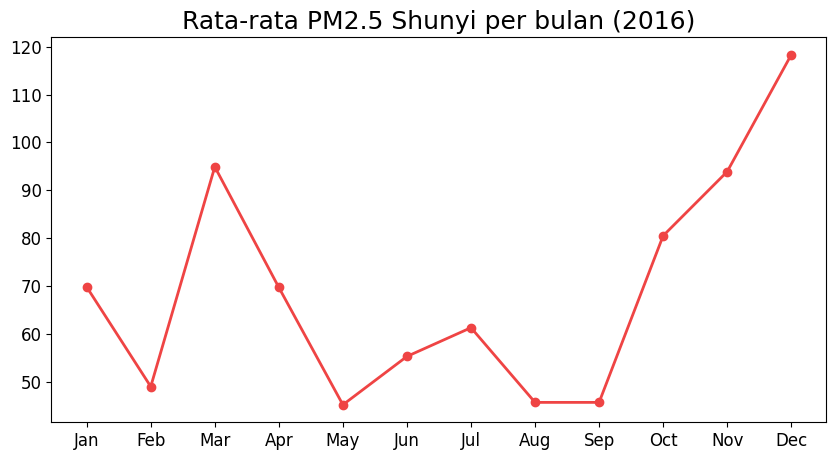

In [36]:
plt.figure(figsize=(10, 5))
plt.plot(
    pd.to_datetime(PM2_by_month["month"], format="%m").dt.strftime("%b"),
    PM2_by_month["PM2.5"],
    marker="o",
    linewidth=2,
    color="#ef4444"
    )
plt.title("Rata-rata PM2.5 Shunyi per bulan (2016)", loc="center", fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

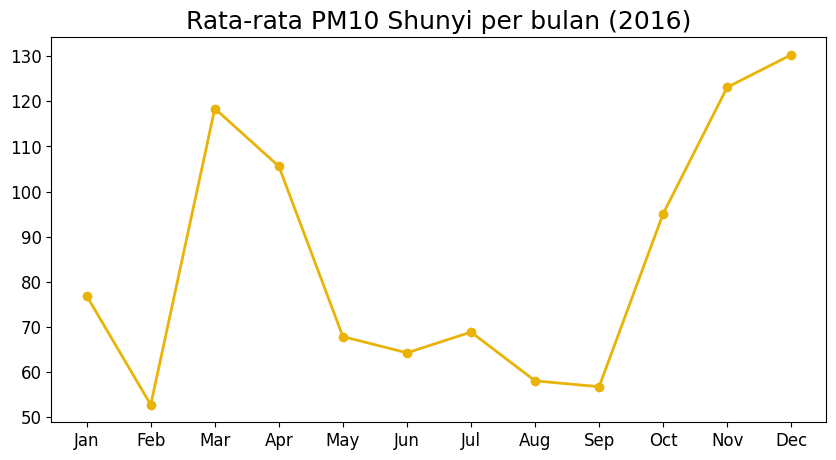

In [37]:
plt.figure(figsize=(10, 5))
plt.plot(
    pd.to_datetime(PM10_by_month["month"], format="%m").dt.strftime("%b"),
    PM10_by_month["PM10"],
    marker="o",
    linewidth=2,
    color="#eab308"
    )
plt.title("Rata-rata PM10 Shunyi per bulan (2016)", loc="center", fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Pertanyaan 2:

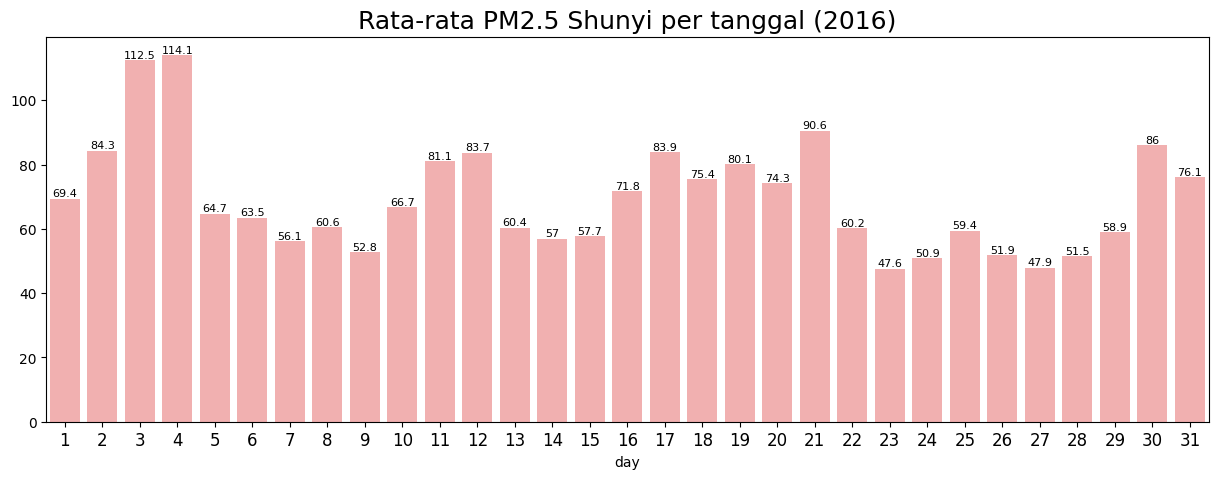

In [42]:
plt.figure(figsize=(15, 5))

ax = sns.barplot(
    y="PM2.5",
    x="day",
    data=PM2_by_day,
    color="#fca5a5"
)

for count in ax.containers:
  ax.bar_label(count, fontsize=8)

plt.title("Rata-rata PM2.5 Shunyi per tanggal (2016)", loc="center", fontsize=18)
plt.ylabel(None)
plt.tick_params(axis="x", labelsize=12)
plt.show()

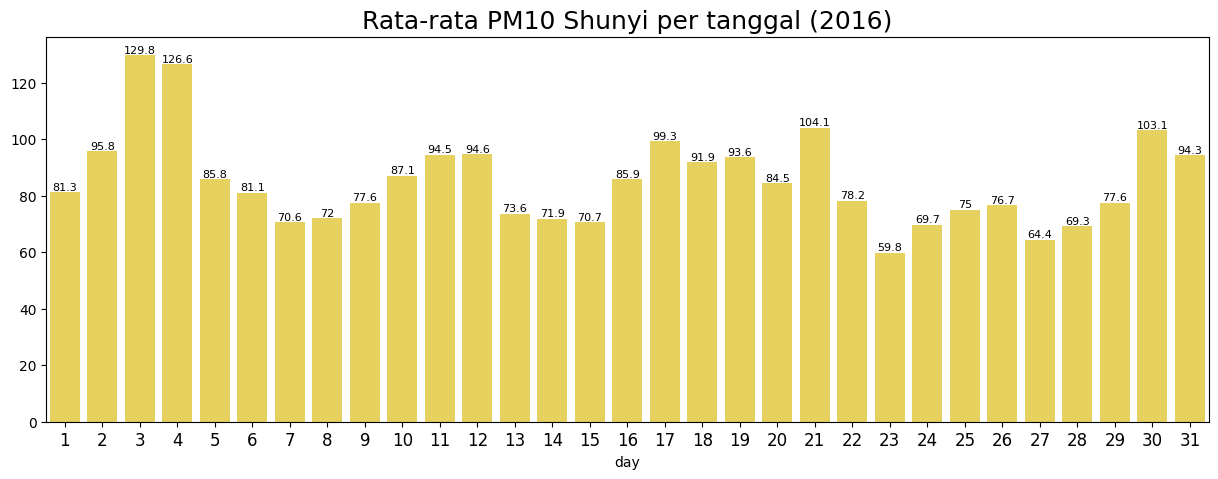

In [43]:
plt.figure(figsize=(15, 5))

ax = sns.barplot(
    y="PM10",
    x="day",
    data=PM10_by_day,
    color="#fde047"
)

for count in ax.containers:
  ax.bar_label(count, fontsize=8)

plt.title("Rata-rata PM10 Shunyi per tanggal (2016)", loc="center", fontsize=18)
plt.ylabel(None)
plt.tick_params(axis="x", labelsize=12)
plt.show()

**Insight:**
- Nilai rata-rata PM2.5 dan PM10 di tanggal 3 dan 4 cenderung lebih tinggi dibanding tanggal lainnya.

## Analisis Lanjutan (Opsional)

## Conclusion

- Berdasarkan grafis nilai PM2.5 dan PM10 yang menanjak signifikan di Q4 dan puncaknya terjadi di bulan Desember, maka perlu diteliti apakah musim mempengaruhi kenaikan tersebut.
- Perlu dicari tahu aktivitas industri atau kegiatan masyarakat apa yang secara konsisten membuat tanggal 3 dan 4 lebih tinggi nilai PM2.5 dan PM10-nya dibanding tanggal-tanggal lainnya, terlebih lagi tanggal di tiap bulan selalu jatuh di hari berbeda.

In [44]:
aqi_df.to_csv("shunyi_aqi.csv", index=False)